In [37]:
import torch
import torch.nn as nn
import numpy as np 
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

import glob

In [25]:
def har_dataset (phase):
    x = []
    data_dir = f'D:/deeplearning_DrMajd/rnn/UCI_HAR_Dataset/{phase}/Inertial Signals/*'
    for file_dir in glob.glob(data_dir):
        x.append(np.loadtxt(file_dir))
    y = np.loadtxt(f'D:/deeplearning_DrMajd/rnn/UCI_HAR_Dataset/{phase}/y_{phase}.txt')

    x = torch.FloatTensor(x).permute(1, 2, 0)
    y = torch.LongTensor(y)-1
    return x, y

In [27]:
x_train,y_train = har_dataset('train')
x_test,y_test = har_dataset('test')
x_train.shape

torch.Size([7352, 128, 9])

In [28]:
y_train, y_test

(tensor([4, 4, 4,  ..., 1, 1, 1]), tensor([4, 4, 4,  ..., 1, 1, 1]))

In [29]:
torch.unique(y_test)

tensor([0, 1, 2, 3, 4, 5])

In [31]:
train_data = TensorDataset(x_train, y_train)
test_data = TensorDataset(x_test, y_test)

In [32]:
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=128, shuffle=False)

In [41]:
x, y = next(iter(train_loader))
print(x.shape)
print(y.shape)

torch.Size([64, 128, 9])
torch.Size([64])


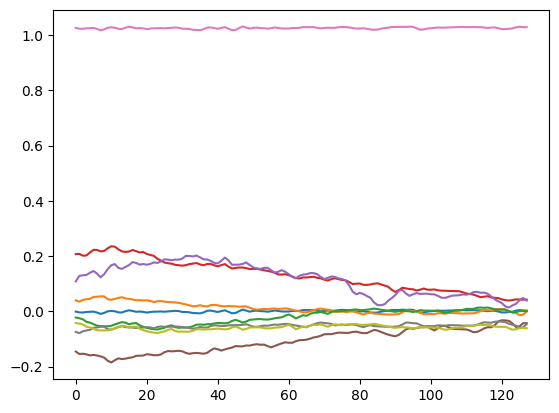

In [42]:
plt.plot(x[0])

### Model

In [43]:
model = nn.RNN(input_size=9, 
               hidden_size=32, 
               num_layers=2, 
               nonlinearity='tanh', 
               bias=True,  
               batch_first=True, 
               dropout=0., 
               bidirectional=False)

In [47]:
outputs, hn = model(x)

In [81]:
def RNNModel(x ,input_size, hidden_size, num_layers, bidirectioanl, num_cls):
    outputs, _ = nn.RNN(input_size=input_size, 
                         hidden_size=hidden_size,
                         num_layers=num_layers, 
                         bidirectional=bidirectioanl,
                         batch_first=True)(x)
    y = nn.LazyLinear(num_cls)(outputs)
    y = y.mean(dim=1)
    return y

In [82]:
# print(x.shape)
model = RNNModel(x, 9, 32, 1, False, 6)
model

e:\Anaconda\installation\envs\wide_camera\Lib\site-packages\torch\nn\modules\lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


tensor([[-0.2027,  0.2708,  0.1275,  0.0123,  0.1178,  0.0050],
        [-0.2005,  0.2834,  0.1387,  0.0156,  0.0965,  0.0313],
        [-0.2121,  0.2627,  0.1317, -0.0376,  0.1054, -0.0207],
        [-0.2202,  0.2476,  0.1392, -0.0295,  0.1044, -0.0181],
        [-0.1969,  0.2788,  0.1430, -0.0076,  0.1127,  0.0079],
        [-0.1864,  0.2828,  0.1398, -0.0081,  0.1249,  0.0176],
        [-0.1939,  0.2765,  0.1421, -0.0082,  0.1106,  0.0102],
        [-0.1075,  0.2767,  0.2245, -0.0522,  0.0930,  0.1572],
        [-0.2142,  0.2640,  0.1407, -0.0075,  0.1032,  0.0080],
        [-0.2107,  0.2603,  0.1310, -0.0138,  0.0938, -0.0025],
        [-0.1840,  0.2789,  0.1507, -0.0083,  0.1107,  0.0166],
        [-0.1972,  0.2754,  0.1486, -0.0050,  0.1114,  0.0112],
        [-0.1567,  0.2967,  0.1663,  0.0137,  0.1175,  0.0596],
        [-0.2194,  0.2573,  0.1372, -0.0327,  0.1044, -0.0204],
        [-0.1832,  0.2827,  0.1529,  0.0026,  0.1147,  0.0250],
        [-0.2489,  0.2427,  0.1214, -0.0

In [64]:
outputs, _ = nn.RNN(input_size=9, 
                        hidden_size=32,
                        num_layers=1, 
                        bidirectional=False,
                        batch_first=True)(x)
y = nn.LazyLinear(6)(outputs)
y = y.mean(dim=1)
y

tensor([[-0.1077, -0.2603,  0.0963, -0.0688,  0.2527,  0.2645],
        [-0.1096, -0.2689,  0.0902, -0.0873,  0.2326,  0.2824],
        [-0.0870, -0.2783,  0.0912, -0.0546,  0.2291,  0.2636],
        [-0.0755, -0.2656,  0.0905, -0.0410,  0.2393,  0.2524],
        [-0.1012, -0.2743,  0.0904, -0.0707,  0.2292,  0.2740],
        [-0.1049, -0.2632,  0.0901, -0.0573,  0.2373,  0.2749],
        [-0.1072, -0.2745,  0.0911, -0.0677,  0.2265,  0.2753],
        [-0.1275, -0.2093,  0.0649,  0.0122,  0.1950,  0.3198],
        [-0.0808, -0.2723,  0.0894, -0.0703,  0.2351,  0.2680],
        [-0.0883, -0.2752,  0.0934, -0.0631,  0.2328,  0.2650],
        [-0.1083, -0.2749,  0.0890, -0.0625,  0.2216,  0.2790],
        [-0.0992, -0.2733,  0.0888, -0.0653,  0.2320,  0.2751],
        [-0.1277, -0.2670,  0.0866, -0.0710,  0.2194,  0.2980],
        [-0.0795, -0.2709,  0.0889, -0.0465,  0.2367,  0.2578],
        [-0.1117, -0.2721,  0.0890, -0.0675,  0.2285,  0.2824],
        [-0.0529, -0.2633,  0.0887, -0.0

In [49]:
outputs, hn = nn.RNN(input_size=9, 
                         hidden_size=32,
                         num_layers=1, 
                         bidirectional=False,
                         batch_first=True)(x)

In [51]:
print(outputs.shape), print(hn.shape)

torch.Size([64, 128, 32])
torch.Size([1, 64, 32])


(None, None)